In [238]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
kmeans = KMeans()
from matplotlib.backends.backend_pdf import PdfPages

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import re
color = sns.color_palette()

%matplotlib inline

In [292]:
full = pd.read_csv('train_set_nonscaled.csv')
#submission = pd.read_csv('sample_submission.csv')
#properties = pd.read_csv('pr')

In [ ]:
full.shape()


### Cross Validation

#### Train-test split.

In [294]:
full.set_index('parcelid',inplace =True)


In [295]:
full_set = full

In [298]:
full_set['latitude']=full_set.latitude/1e6

In [299]:
full_set['longitude']=full_set.longitude/1e6

In [303]:
X = full_set.drop('logerror',axis=1)
y = full_set['logerror']

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=0)
                                                         
                                                                                                 

### Random Forest

In [305]:
X_train.shape


(58682, 24)

In [307]:
parameters = {'n_estimators':[500,800,1200],'n_jobs':[-1],'oob_score':[False],
              'max_features':["sqrt","log2"],
             'min_samples_leaf':[2,5,10],
             'min_samples_split':[2,5,10,15,100]}

rf_reg = RandomForestRegressor(verbose=1)


In [357]:
rf_cv = GridSearchCV(rf_reg,
                    param_grid = parameters,
                    scoring = 'neg_mean_absolute_error',
                    cv=3)


In [309]:
rf_cv.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapse

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   44.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | e

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   33.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | 

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   32.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   27.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | e

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   27.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | 

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapse

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   47.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 

KeyboardInterrupt: 

best cv parameters

In [269]:
print(rf_cv.best_params_)

{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 1200, 'n_jobs': -1, 'oob_score': False}


In [270]:
def feature_importance(estimator,labels):
    feature_imp = pd.DataFrame.from_dict({'feature':labels,
                                         'importance':estimator.feature_importances_})
    feature_imp.set_index('feature',
                          inplace=False,
                          drop=True)
    feature_imp = feature_imp.sort_values('importance',ascending=False)
    return(feature_imp)
    
    

In [271]:
featureImportance = feature_importance(rf_cv.best_estimator_, X_train.columns)

In [234]:
featureImportance


,feature,importance
2,structuretaxvaluedollarcnt,0.071002
5,taxamount,0.069018
9,latitude,0.067988
23,taxpersqft,0.067604
22,sqftperrm,0.067081
3,taxvaluedollarcnt,0.066242
4,landtaxvaluedollarcnt,0.066013
1,lotsizesquarefeet,0.065959
0,calculatedfinishedsquarefeet,0.065840
10,longitude,0.064885


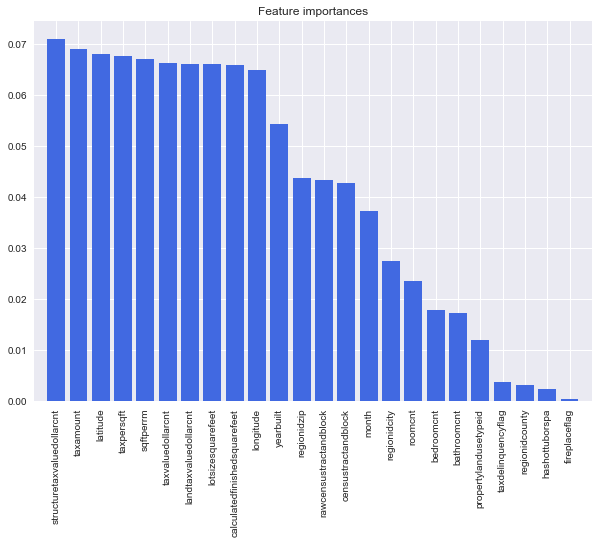

In [249]:
f = plt.figure(figsize=(10,7))
plt.title("Feature importances")
plt.bar(np.arange(len(featureImportance.feature)),featureImportance.importance,color="royalblue",align='center')
plt.xticks(np.arange(len(featureImportance.feature)), featureImportance.feature, rotation='vertical')
plt.xlim([-1, len(featureImportance.feature)])
f.savefig("featureImportance.pdf", bbox_inches='tight')



In [236]:
plt.show()

In [272]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,rf_cv.best_estimator_.predict(X_test))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:    3.3s finished


0.068382199408694722

### Modify

### Clustering

In [201]:
region = pd.read_csv('region.csv')

In [200]:
KMeans?

In [203]:
region.head(5)

,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,taxamount,propperzip
0,37688,3101,96337,0,0.0,9.0,0.00,8496
1,37688,3101,96337,0,0.0,27516.0,0.00,8496
2,51617,3101,96095,0,650756.0,1413387.0,20800.37,9437
3,12447,3101,96424,1948,571346.0,1156834.0,14557.57,7916
4,12447,3101,96450,1947,193796.0,433491.0,5725.17,7725


In [208]:
type(region)

pandas.core.frame.DataFrame

### Clustering on training set

In [340]:
full2 = pd.read_csv('train_set_nonscaled_02_K5.csv')

In [341]:
full2.head(5)

,Unnamed: 0,parcelid,logerror,calculatedfinishedsquarefeet,lotsizesquarefeet,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,month,...,yearbuilt,fireplaceflag,taxdelinquencyflag,rawcensustractandblock,bathroomcnt,roomcnt,censustractandblock,sqftperrm,taxpersqft,level
0,1,11016594,0.0276,-0.086448,-0.162786,-0.266213,-0.172866,-0.102003,0.116566,-1.730618,...,-0.387800,-0.050295,-0.142576,-0.588941,-0.291720,-0.176793,-0.589103,-0.001993,-0.068262,2
1,2,12098116,-0.0040,0.493080,-0.128323,-0.560333,-0.606260,-0.549268,0.812695,-1.730618,...,-1.192795,-0.050295,-0.142576,-0.571561,0.725825,-0.176793,-0.571723,0.435549,-0.335128,2
2,3,12643413,0.0218,-1.005211,0.397560,-0.030163,-0.380829,-0.510772,-0.423957,-1.730618,...,0.798507,-0.050295,-0.142576,-0.579712,-0.291720,-0.699869,-0.579874,-0.557911,0.061993,2
3,4,14432541,-0.0050,0.564842,-0.176305,-0.039573,-0.038696,-0.033329,-0.066229,-1.730618,...,0.544298,-0.050295,-0.142576,0.478509,0.217053,0.869359,0.478339,0.021197,-0.107568,3
4,5,11509835,-0.2705,1.417280,-0.205432,3.402516,3.593122,3.211638,3.105773,-1.730618,...,0.586666,-0.050295,-0.142576,-0.563911,1.743370,1.392435,-0.564073,0.294080,0.907528,1


In [346]:
full2 = full2.drop('Unnamed: 0',axis=1)

In [347]:
full2.head()

,parcelid,logerror,calculatedfinishedsquarefeet,lotsizesquarefeet,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,month,bedroomcnt,...,yearbuilt,fireplaceflag,taxdelinquencyflag,rawcensustractandblock,bathroomcnt,roomcnt,censustractandblock,sqftperrm,taxpersqft,level
0,11016594,0.0276,-0.086448,-0.162786,-0.266213,-0.172866,-0.102003,0.116566,-1.730618,-0.042894,...,-0.387800,-0.050295,-0.142576,-0.588941,-0.291720,-0.176793,-0.589103,-0.001993,-0.068262,2
1,12098116,-0.0040,0.493080,-0.128323,-0.560333,-0.606260,-0.549268,0.812695,-1.730618,-0.929383,...,-1.192795,-0.050295,-0.142576,-0.571561,0.725825,-0.176793,-0.571723,0.435549,-0.335128,2
2,12643413,0.0218,-1.005211,0.397560,-0.030163,-0.380829,-0.510772,-0.423957,-1.730618,-0.929383,...,0.798507,-0.050295,-0.142576,-0.579712,-0.291720,-0.699869,-0.579874,-0.557911,0.061993,2
3,14432541,-0.0050,0.564842,-0.176305,-0.039573,-0.038696,-0.033329,-0.066229,-1.730618,0.843594,...,0.544298,-0.050295,-0.142576,0.478509,0.217053,0.869359,0.478339,0.021197,-0.107568,3
4,11509835,-0.2705,1.417280,-0.205432,3.402516,3.593122,3.211638,3.105773,-1.730618,0.843594,...,0.586666,-0.050295,-0.142576,-0.563911,1.743370,1.392435,-0.564073,0.294080,0.907528,1


In [349]:
full2.set_index('parcelid',inplace =True)

In [350]:
full_set2 = full2

In [351]:
full_set2['latitude']=full_set.latitude/1e6

In [352]:
full_set2['longitude']=full_set.longitude/1e6

In [353]:
X = full_set2.drop('logerror',axis=1)
y = full_set2['logerror']

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=0)
                                                         

#### Random Forest

In [366]:
list(X_train)


['calculatedfinishedsquarefeet',
 'lotsizesquarefeet',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'month',
 'bedroomcnt',
 'hashottuborspa',
 'latitude',
 'longitude',
 'propertylandusetypeid',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'yearbuilt',
 'fireplaceflag',
 'taxdelinquencyflag',
 'rawcensustractandblock',
 'bathroomcnt',
 'roomcnt',
 'censustractandblock',
 'sqftperrm',
 'taxpersqft',
 'level']

In [363]:
parameters = {'n_estimators':[800,1200],'n_jobs':[-1],'oob_score':[False],
              'max_features':["sqrt"],
             'min_samples_leaf':[2,5,10]}
             #'min_samples_split':[2,5,10,15,100]}

rf_reg = RandomForestRegressor(verbose=1)


In [364]:
rf_cv = GridSearchCV(rf_reg,
                    param_grid = parameters,
                    scoring = 'neg_mean_absolute_error',
                    cv=3)

In [365]:
rf_cv.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elaps

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=1, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [800, 1200], 'n_jobs': [-1], 'oob_score': [False], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [367]:
print(rf_cv.best_params_)

{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 800, 'n_jobs': -1, 'oob_score': False}


In [368]:
def feature_importance(estimator,labels):
    feature_imp = pd.DataFrame.from_dict({'feature':labels,
                                         'importance':estimator.feature_importances_})
    feature_imp.set_index('feature',
                          inplace=False,
                          drop=True)
    feature_imp = feature_imp.sort_values('importance',ascending=False)
    return(feature_imp)
    
    

In [369]:
featureImportance = feature_importance(rf_cv.best_estimator_, X_train.columns)

In [370]:
featureImportance

,feature,importance
5,taxamount,0.083614
2,structuretaxvaluedollarcnt,0.080609
0,calculatedfinishedsquarefeet,0.075894
1,lotsizesquarefeet,0.075170
23,taxpersqft,0.075031
3,taxvaluedollarcnt,0.073908
22,sqftperrm,0.073741
4,landtaxvaluedollarcnt,0.070805
15,yearbuilt,0.063928
18,rawcensustractandblock,0.060269


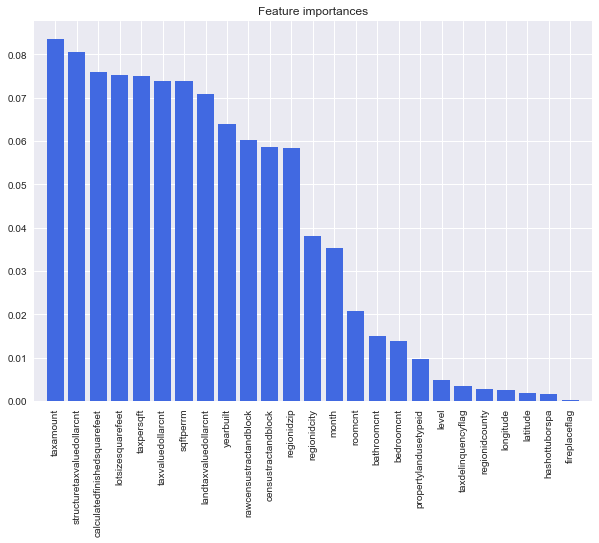

In [371]:
f = plt.figure(figsize=(10,7))
plt.title("Feature importances")
plt.bar(np.arange(len(featureImportance.feature)),featureImportance.importance,color="royalblue",align='center')
plt.xticks(np.arange(len(featureImportance.feature)), featureImportance.feature, rotation='vertical')
plt.xlim([-1, len(featureImportance.feature)])
f.savefig("featureImportanceCluster.pdf", bbox_inches='tight')


In [372]:
plt.show()

In [373]:
mean_absolute_error(y_test,rf_cv.best_estimator_.predict(X_test))


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    2.0s finished


0.068467762699538678